![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [55]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


### Which hour has the highest frequency of crimes?

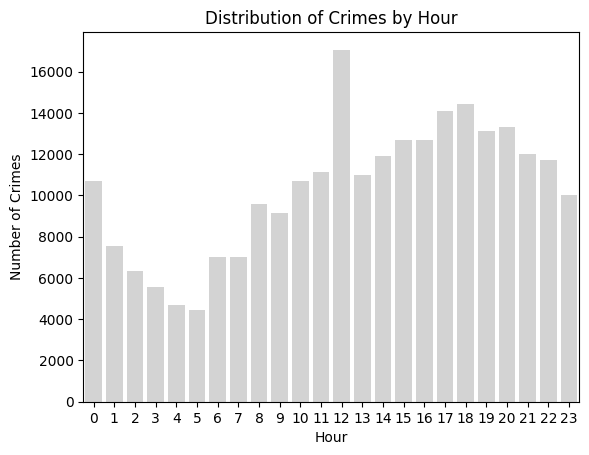

In [56]:
# Convert 'TIME OCC' to datetime format
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M', errors='coerce').dt.time

# Extract the hour from 'TIME OCC'
crimes['Hour'] = crimes['TIME OCC'].apply(lambda x: x.hour)

# Count the occurrences of crimes by hour
hourly_crimes = crimes['Hour'].value_counts().sort_index()

# Plot the distribution of crimes by hour
sns.barplot(x=hourly_crimes.index, y=hourly_crimes.values, color='#D3D3D3')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.title('Distribution of Crimes by Hour')
plt.show()

In [57]:
peak_crime_hour = hourly_crimes.idxmax()
print(f"The peak hour for crimes is: {peak_crime_hour}")

The peak hour for crimes is: 12


### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

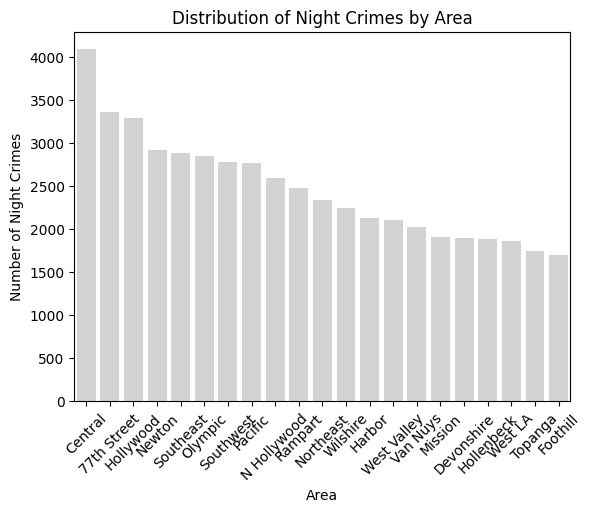

In [58]:
import datetime as dt
night_crimes = crimes[(crimes['TIME OCC'] >= dt.time(22, 0)) | (crimes['TIME OCC'] < dt.time(4, 0))]

# Count the occurrences of night crimes by area
night_crime_count_by_area = night_crimes['AREA NAME'].value_counts()

sns.barplot(x=night_crime_count_by_area.index, y=night_crime_count_by_area.values, color='#D3D3D3')
plt.xlabel('Area')
plt.ylabel('Number of Night Crimes')
plt.title('Distribution of Night Crimes by Area')
plt.xticks(rotation=45)
plt.show()

In [59]:
peak_night_crime_location = night_crime_count_by_area.idxmax()
print(f"The area with the largest frequency of night crimes is: {peak_night_crime_location}")

The area with the largest frequency of night crimes is: Central


### Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+).

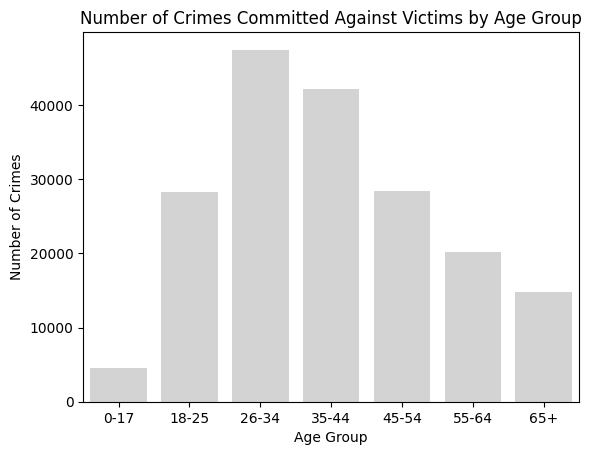

In [60]:
bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels)
crimes_by_age_group = crimes['Age Group'].value_counts()

sns.barplot(x=crimes_by_age_group.index, y=crimes_by_age_group.values, color='#D3D3D3')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Committed Against Victims by Age Group')
plt.show()

In [61]:
victim_ages = crimes_by_age_group
print("Number of crimes committed against victims by age group:")
print(victim_ages)

Number of crimes committed against victims by age group:
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Group, dtype: int64
